<a href="https://colab.research.google.com/github/RamadaniOktavia/DIF62130_B_25_2311533002/blob/main/Praktikum1/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overview

Getting the Data

Reviewing data
Modeling
Model Evaluation
using model
storing




Import library yang diperlukan seperti pandas, numpy, sklearn, dan lainnya

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

Latitude and Longitude (Geographic parameter)

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(data = housing.data, columns=housing.feature_names)
df['MedHouseValue'] = pd.Series(housing.target)

targets=df['MedHouseValue']                 #dependent Variable
inputs=df.drop(['MedHouseValue'], axis=1)   #Independent Variable
df.head(10)                                   #Menampilkan 5 data teratas

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


Target Variable:
medHouseVal (Median house value in $100,000s)
Predictor Variables:
MedInc (Median Income)
HouseAge (Age of House


In [ ]:
# df.describe()                         # Use the describe() atau info() function to get a
# df.info()

# Data Preprocessing

bagi dataset menjadi data training (70%) dan data testing (30%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(14448, 8) (6192, 8)
(14448,) (6192,)


lakukan data preprocessing pada dayta training dan testing dengan menstransformasi semua fitur agar nilainya berada pada selang [0,1]

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_test)

[[1.89659453e-01 7.45098039e-01 2.59249620e-02 ... 8.26699958e-04
  1.61530287e-01 5.94594595e-01]
 [1.01964111e-01 7.05882353e-01 2.93658328e-02 ... 1.49655077e-03
  4.50584485e-01 4.52452452e-01]
 [2.42293210e-01 8.82352941e-01 2.57625553e-02 ... 2.43712035e-03
  5.51540914e-01 1.88188188e-01]
 ...
 [1.43901463e-01 9.01960784e-01 2.71911561e-02 ... 1.63065424e-03
  5.92986185e-01 2.05205205e-01]
 [1.45508338e-01 2.35294118e-01 2.97484189e-02 ... 1.59782455e-03
  5.87672689e-01 2.06206206e-01]
 [8.33367816e-02 5.49019608e-01 1.45501245e-02 ... 1.74904890e-03
  1.65781084e-01 6.00600601e-01]]


# Modeling

Latih model regresi linier menggunakan semua fitur di data training yang sudah diskalakan.
Kemudian tampilkamn nilai intercept dan slope variablenya

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(f'Intercept: {lr_model.intercept_}')
print(f'slope: {lr_model.coef_}')

Intercept: 3.7215161325064994
slope: [  6.39513914   0.49408893 -14.78075919  20.98391128  -0.2003207
  -4.08551937  -3.98214561  -4.37460957]


Model Evaluation

Evaluasi model yang telah dilatih menggunakan data testing dengan menghitung MSE dan R2 serta plot hubungan antara target output sdan hasil prediksinya

In [ ]:
y_pred=lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = lr_model.score(X_test, y_test)
print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 0.5296293151408232
R2: 0.597142973735963


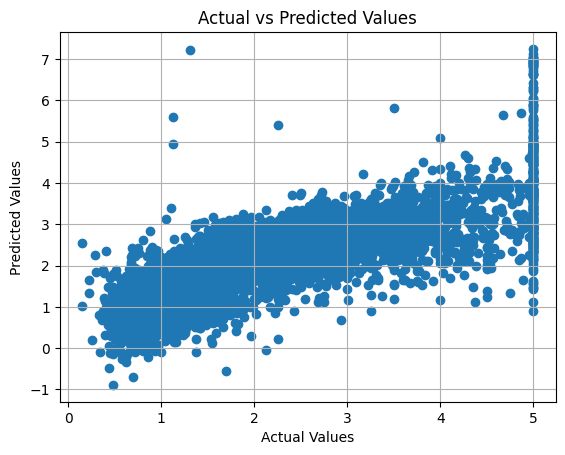

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
# save the model to disk

import pickle
filename = 'finalized_model.sav'
pickle.dump(lr_model, open(filename, 'wb'))